In [240]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [241]:
def E(y, x, a, b, c, d): 
  sum = 0.
  for i in range(x.size): 
    sum += (y[i] - (a * x[i] ** 3 + b * x[i] ** 2 + c * x[i] + d)) ** 2
  return sum 

In [242]:
# plot x and y
def plot(x, y, a, b, c, d):
  plt.plot(x, y, 'ro')
  plt.plot(x, a * x ** 3 + b * x ** 2 + c * x + d)
  plt.show()

In [243]:
x = np.array([i for i in range(-6, 7)])
y = np.array([102.50, 87.0, 67.10, 45.80, 26.10, 11.00, 3.5, 6.60, 23.30, 56.60, 109.50, 185.00, 286.10])
#y = np.array([103, 87, 67, 46, 26, 11, 4, 7, 23, 57, 110, 185, 286])

In [244]:
one = np.ones(x.size)
A = np.matrix([x**3,x**2,x, one]).T

In [245]:
def jacobian(A, B):
    X = np.linalg.inv(A.T @ A) @ A.T @ B
    Err = E(y, x, X[0,0], X[0,1], X[0,2], X[0,3])
    return X, Err


In [246]:
a = jacobian(A,y)[0][0,0]
b = jacobian(A,y)[0][0,1]
c = jacobian(A,y)[0][0,2]
d = jacobian(A,y)[0][0,3]

print("a = ", a, "b = ", b, "c = ", c, "d = ", d)
print("Error = ", jacobian(A,y)[1])

a =  0.5000000000000001 b =  5.300000000000002 c =  -2.7000000000000015 d =  3.4999999999999987
Error =  1.3044012283055735e-26


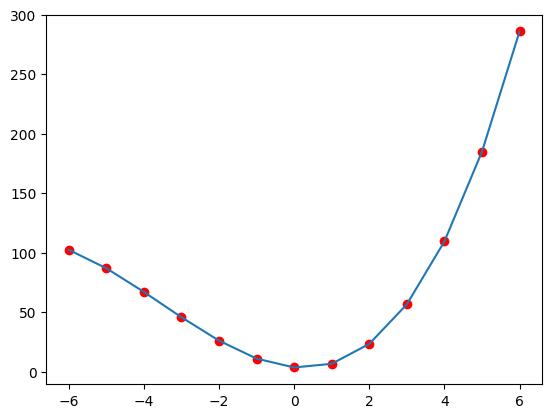

In [247]:
plot(x, y, a, b, c, d)

Brake at iteration  4
a =  0.5 b =  5.300000000000001 c =  -2.7 d =  3.4999999999999964
E =  2.3168844786341117e-27


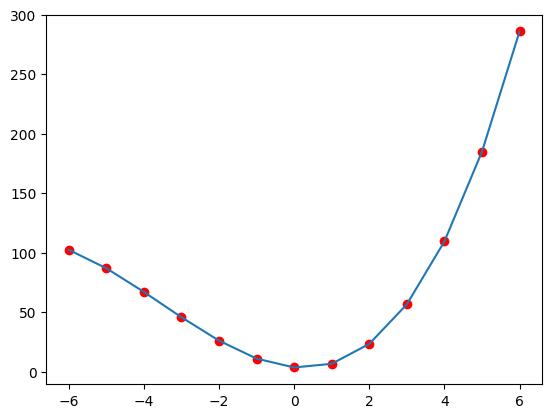

In [248]:
e = []
n = 1000000
i = 0
a,b,c,d,alpha = 1,1,1,1,1
B = np.matrix([-x**3,-x**2,-x, -one]).T
for i in range(n):
    r = y - (a * x ** 3 + b * x ** 2 + c * x + d)
    a -= alpha * jacobian(B,r)[0][0,0]
    b -= alpha * jacobian(B,r)[0][0,1]
    c -= alpha * jacobian(B,r)[0][0,2]
    d -= alpha * jacobian(B,r)[0][0,3]
    e.append(E(y, x, a, b, c, d))

    if np.any(e[i-1] <= e[i]) and i > 0:
        print('Brake at iteration ', i)
        break

print("a = ", a, "b = ", b, "c = ", c, "d = ", d)
print("E = ", E(y, x, a, b, c, d))
plot(x, y, a, b, c, d)
    